In [1]:
# -*- coding: utf-8 -*-
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from mrcnn.config import Config
# import utils
from mrcnn import model as modellib, utils
from mrcnn import visualize
import yaml
from mrcnn.model import log
from PIL import Image

ROOT:  D:\Project\Mask_RCNN\samples\leather
Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# Root directory of the project
#ROOT_DIR = os.getcwd()
ROOT_DIR = os.path.abspath("../../")

# ROOT_DIR = os.path.abspath("../")
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

iter_num = 0


In [3]:
class ShapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 4

    # Number of classes (including background)
    NUM_CLASSES = 1 + 9  # background + 1 class

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 384
    IMAGE_MAX_DIM = 448

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8 * 6, 16 * 6, 32 * 6, 64 * 6, 128 * 6)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
    
class LtConfig(ShapesConfig):
    #super()
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

In [17]:
config = LtConfig()
config.display()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR)
model_path = os.path.join(ROOT_DIR, "logs",'shapes20201216T1352', 'mask_rcnn_shapes_0040.h5')
#model_path = model.find_last()
print(model_path)


Configurations:
AUGMENT                        False
AUGMENTATION                   False
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  448
IMAGE_META_SIZE                22
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [448 448   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_


Configurations:
AUGMENT                        False
AUGMENTATION                   False
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  448
IMAGE_META_SIZE                22
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [448 448   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_

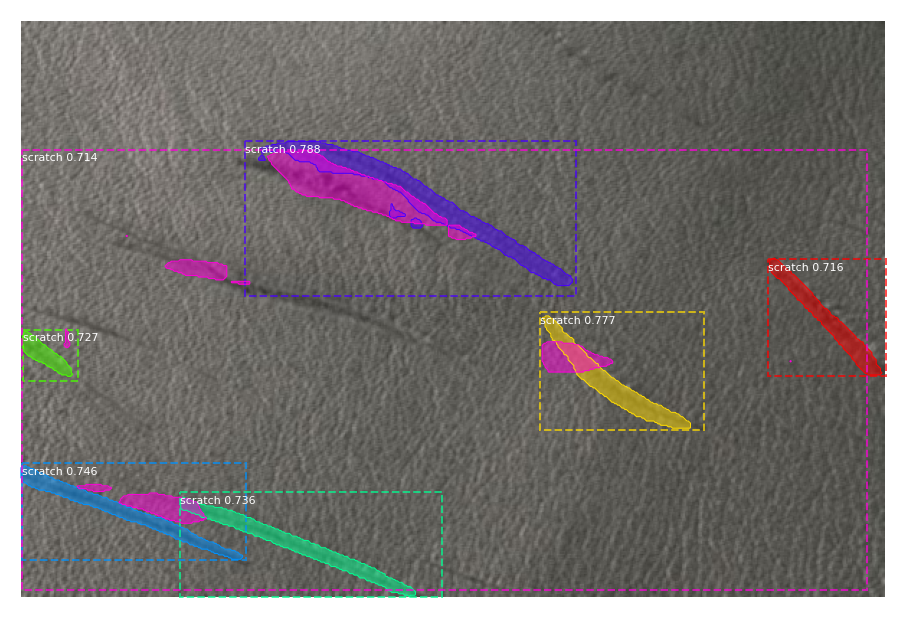

In [18]:
def predict():
    import skimage.io
    from mrcnn import visualize

    # Create models in training mode
    config = LtConfig()
    config.display()
    model = modellib.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR)
    #COCO_MODEL_PATH = model.find_last()
    
    # Local path to trained weights file
    #model_path = os.path.join(MODEL_DIR ,"shapes20201215T1344","mask_rcnn_shapes_0040.h5")
    
    # Load trained weights (fill in path to trained weights here)
    #assert model_path != "", "Provide path to trained weights"
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)

    class_names = ['BG','scratch', 'scratch2','Wrinkles', 'Wrinkles2','vein', 'vein2','GrowthPattern','dot','scratch3']

    # Load a random image from the images folder
    #file_names = r'D:\Project\Mask_RCNN\samples\leather\info\pic\04.jpg' # next(os.walk(IMAGE_DIR))[2]
    file_names = r'D:\Project\Mask_RCNN\samples\leather\info\01.jpg' # next(os.walk(IMAGE_DIR))[2]
    # image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
    #image = skimage.io.imread(file_names) #RGB
    image = cv2.imread(file_names)
    image = image[...,::-1] # BGR to RGB
    image = cv2.blur(image, (3, 3))    

    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    print(r['class_ids'])
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

if __name__ == "__main__":
    #train_model()
    predict()

In [ ]:
'''
# -*- coding: utf-8 -*-
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
import time
from mrcnn.config import Config
from datetime import datetime
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
 
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
# sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
# from samples.coco import coco
 
 
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
 
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(MODEL_DIR ,"shapes20201215T1113","mask_rcnn_shapes_0020.h5")
#print(COCO_MODEL_PATH)
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
    print("cuiwei***********************")
 
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
 
class ShapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "shapes"
 
    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # Number of classes (including background)
    NUM_CLASSES = 1 + 4  # background + 3 shapes
 
    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 320
    IMAGE_MAX_DIM = 384
 
    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8 * 6, 16 * 6, 32 * 6, 64 * 6, 128 * 6)  # anchor side in pixels
 
    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE =100
 
    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100
 
    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 50
 
#import train_tongue
#class InferenceConfig(coco.CocoConfig):
class InferenceConfig(ShapesConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
config = InferenceConfig()
 
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
 
 
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
 
# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)
 
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG','scratch', 'Wrinkles', 'vein', 'GrowthPattern']
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread("D:\\Project\\Mask_RCNN\\samples\\leather\\info\\pic\\03.jpg")
 
a=datetime.now()
# Run detection
results = model.detect([image], verbose=1)
b=datetime.now()
# Visualize results
print("shijian",(b-a).seconds)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])
'''